In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv("baseball.csv")

In [7]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [19]:
len(df.columns)
len(df)

1232

In [27]:
df.loc[:,'RD'] = df.RS - df.RA

In [28]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [67]:
moneyball = df.loc[df['Year']<2002]
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


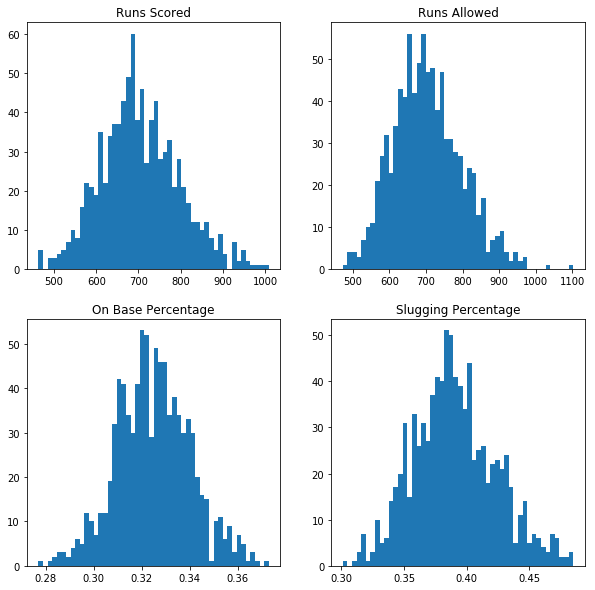

In [68]:
f, ax = plt.subplots(2,2)
ax[0,0].hist(moneyball.RS,bins = 50)
ax[0,0].set_title("Runs Scored")
ax[0,1].hist(moneyball.RA,bins = 50)
ax[0,1].set_title("Runs Allowed")
ax[1,0].hist(moneyball.OBP,bins = 50)
ax[1,0].set_title("On Base Percentage")
ax[1,1].hist(moneyball.SLG,bins = 50)
ax[1,1].set_title("Slugging Percentage")
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

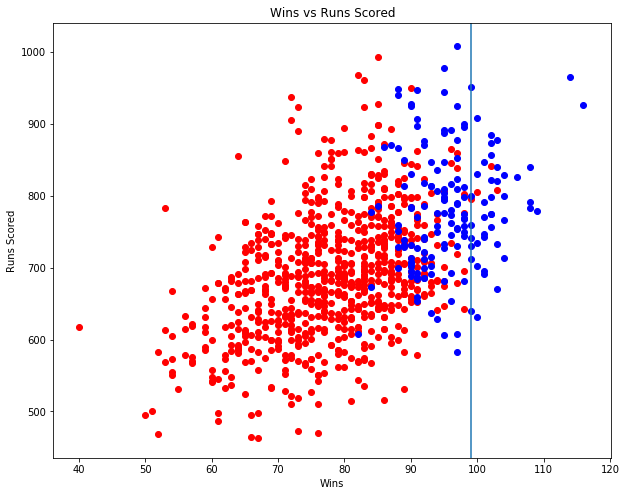

In [104]:
# Subsetting teams qualified for playoffs
moneyball1 = moneyball.loc[moneyball['Playoffs']==1]
moneyball0 = moneyball.loc[moneyball['Playoffs']==0]
# Plotting scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=moneyball0.W,y = moneyball0.RS,c="red")
plt.scatter(x=moneyball1.W,y = moneyball1.RS,c="blue")
plt.title("Wins vs Runs Scored")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 99)

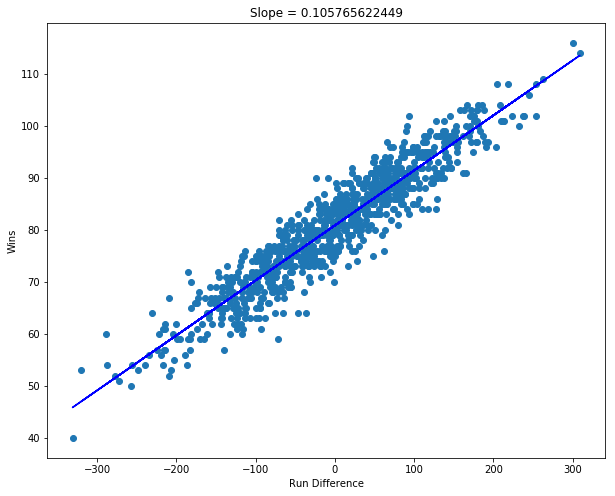

In [114]:
x = np.array(moneyball.RD)
y = np.array(moneyball.W)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

In [120]:
print(np.corrcoef(x,y))

[[ 1.          0.93851498]
 [ 0.93851498  1.        ]]
